# Linear Regression using [Scikit-Learn](https://scikit-learn.org/stable/index.html). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn .preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

### Load the data set

In [3]:
X_train, y_train=load_house_data()
X_features=['size(sqft)','bedrooms','floors','age']

In [6]:
X_train, y_train

(array([[1.24e+03, 3.00e+00, 1.00e+00, 6.40e+01],
        [1.95e+03, 3.00e+00, 2.00e+00, 1.70e+01],
        [1.72e+03, 3.00e+00, 2.00e+00, 4.20e+01],
        [1.96e+03, 3.00e+00, 2.00e+00, 1.50e+01],
        [1.31e+03, 2.00e+00, 1.00e+00, 1.40e+01],
        [8.64e+02, 2.00e+00, 1.00e+00, 6.60e+01],
        [1.84e+03, 3.00e+00, 1.00e+00, 1.70e+01],
        [1.03e+03, 3.00e+00, 1.00e+00, 4.30e+01],
        [3.19e+03, 4.00e+00, 2.00e+00, 8.70e+01],
        [7.88e+02, 2.00e+00, 1.00e+00, 8.00e+01],
        [1.20e+03, 2.00e+00, 2.00e+00, 1.70e+01],
        [1.56e+03, 2.00e+00, 1.00e+00, 1.80e+01],
        [1.43e+03, 3.00e+00, 1.00e+00, 2.00e+01],
        [1.22e+03, 2.00e+00, 1.00e+00, 1.50e+01],
        [1.09e+03, 2.00e+00, 1.00e+00, 6.40e+01],
        [8.48e+02, 1.00e+00, 1.00e+00, 1.70e+01],
        [1.68e+03, 3.00e+00, 2.00e+00, 2.30e+01],
        [1.77e+03, 3.00e+00, 2.00e+00, 1.80e+01],
        [1.04e+03, 3.00e+00, 1.00e+00, 4.40e+01],
        [1.65e+03, 2.00e+00, 1.00e+00, 2.10e+01],


### Scale/normalize the training data

In [5]:
scaler=StandardScaler()
X_norm=scaler.fit_transform(X_train)
print(f"Peak to peak range by column in Raw X: {np.ptp(X_train,axis=0)}")
print(f"Peak to peak range by column in Normalied X: {np.ptp(X_norm,axis=0)}")

Peak to peak range by column in Raw X: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to peak range by column in Normalied X: [5.85 6.14 2.06 3.69]


### Create and fit the regression model

In [13]:
sgdr=SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_} \nNumber of weight updates: {sgdr.t_}")

SGDRegressor()
Number of iterations completed: 122 
Number of weight updates: 12079.0


### View parameters
Note, the parameters are associated with the *normalized* input data.

In [14]:
b_norm=sgdr.intercept_
w_norm=sgdr.coef_
print(f"Model parameters: \nw:{w_norm} \nb:{b_norm}")

Model parameters: 
w:[110.08 -21.06 -32.48 -38.05] 
b:[363.16]


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [18]:
#make prediction using sgdr.predict()
y_pred_sgd=sgdr.predict(X_norm)

#make prediction using w,b
y_pred=np.dot(X_norm, w_norm)+b_norm

print(f"Prediction using np.dot() and predict() match: {(y_pred==y_pred_sgd).all()}") 

print(f"First 4 prediction on training set:\n{y_pred[:4]}" )
print(f"First 4 target values \n{y_train[:4]}")

Prediction using np.dot() and predict() match: True
First 4 prediction on training set:
[295.22 485.79 389.53 491.96]
First 4 target values 
[300.  509.8 394.  540. ]


### Plot Results

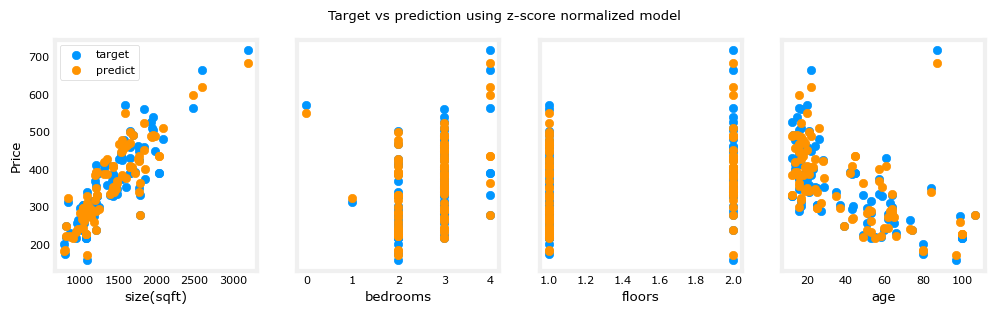

In [20]:
#plot predictions and target vs original features
fig, ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_pred, color=dlc["dlorange"], label='predict')
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target vs prediction using z-score normalized model")
plt.show()